## **IMAGE CLASSIFICATION USING CNN**

**importing required liberaries**

In [ ]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers, models , datasets
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import classifiaction_report

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

y_train = y_train.reshape(-1,)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 127s 1us/step


In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


**plotting samples**

In [15]:
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[np.argmax(y[index])]) 
    plt.show()

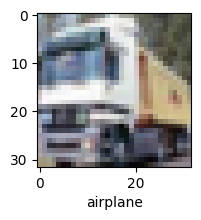

In [16]:
plot_sample(x_train, y_train, 1)

**Normalizing the train and test data**

In [17]:
x_train = x_train / 255.0
x_test = x_test / 255.0

**Building the ANN model**

In [18]:
ANN = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')    
])

ANN.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ANN.fit(x_train, y_train, epochs=5)

c:\Users\13zer\anaconda3\envs\dl\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 90ms/step - accuracy: 0.3046 - loss: 1.9271
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 178s 114ms/step - accuracy: 0.4204 - loss: 1.6461
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 176s 112ms/step - accuracy: 0.4535 - loss: 1.5562
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 162s 103ms/step - accuracy: 0.4774 - loss: 1.4907
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 177s 113ms/step - accuracy: 0.4975 - loss: 1.4318


*Above model have very low accuracy*

In [24]:
CNN = models.Sequential([

    #feature extraction layers
    layers.Conv2D(filters=32 , kernel_size=(3,3) , activation='relu' , input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64 , kernel_size=(3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),

    # classification layers 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


CNN.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

CNN.fit(x_train, y_train, epochs=15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.2071 - loss: 2.1514
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.3915 - loss: 1.7127
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.4559 - loss: 1.5170
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.5051 - loss: 1.3857
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.5456 - loss: 1.2864
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.5795 - loss: 1.1971
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.5973 - loss: 1.1436
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6216 - loss: 1.0825
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.6439 - loss: 1.0301
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6512 - loss: 0.9956
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.6686 - loss: 0.9405
Epoch 12